<a href="https://colab.research.google.com/github/SLIIT-FacultyOfComputing/assignment01-HansakaDilshanJayawardana/blob/main/IT19972176.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#To store and process in a dataframe
import pandas as pd
# advancec ploting
import seaborn as sns
#For ploting graphs
import matplotlib.pyplot as plt
#For numerical analysis
import numpy as np
from numpy import argmax, array_equal
#Layers
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Dropout, Flatten
#Train test split
from sklearn.model_selection import train_test_split
#Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
#Utility functions
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from imgaug import augmenters
from random import randint

In [2]:
#Remove any file and Delete .kaggle directory
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
#Install Kaggle
!pip install -q kaggle

In [4]:
#To upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hansakajayawardana","key":"8f6f6955a13e27d07e5ccf2037da13b8"}'}

In [5]:
#To save this file into a directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#To change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#Download the Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 55% 38.0M/68.8M [00:00<00:00, 205MB/s]
100% 68.8M/68.8M [00:00<00:00, 244MB/s]


In [7]:
#Extract the files in the zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [8]:
#Load Data 
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [11]:
#Train Head
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Test Head
test.head(5) 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Actural item corresponding to each label
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

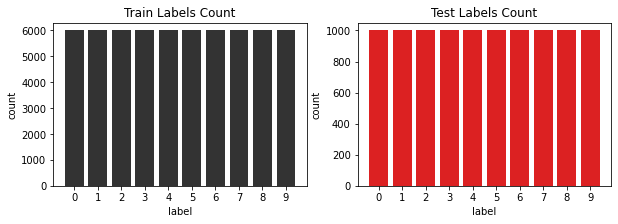

In [15]:
#Label count
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.countplot(train['label'], palette=['#333333' for i in range(10)])
plt.title('Train Labels Count')
plt.plot()

plt.subplot(1, 2, 2)
sns.countplot(test['label'], palette=['#fb0203' for i in range(10)])
plt.title('Test Labels Count')
plt.plot()

In [16]:
#Convert the dataframes into numpy arrays of float32
#Then I can pass them to the tensorflow and keras
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

#Split the train data into X & Y (X axis - Image Data, Y axis - Labels)
#Rescaling image data
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [17]:
#View x_train Data
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
#View y_train Data
y_train

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

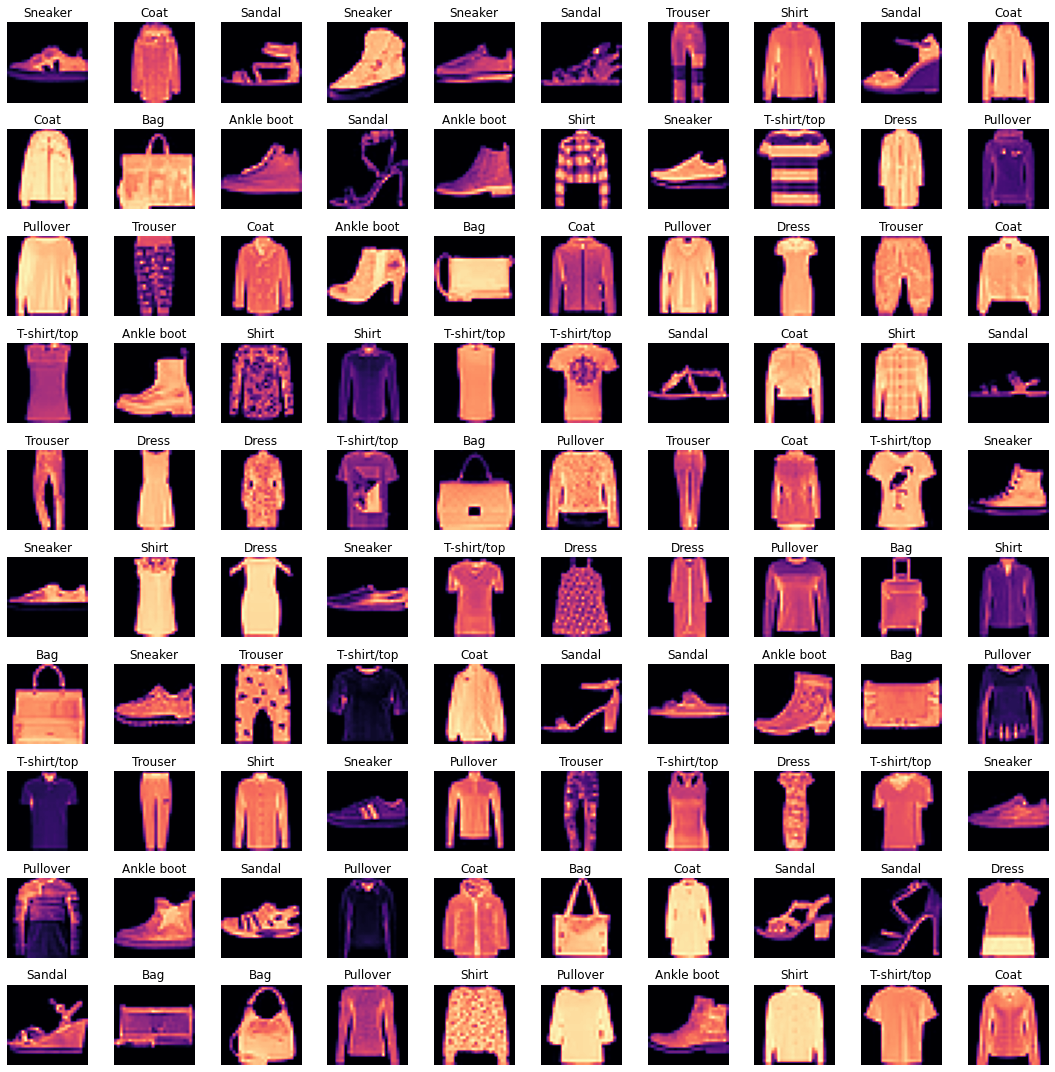

In [20]:
#Data Visualization
#Class Names from Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#First few train images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(x_train))
    img = x_train[data_idx].reshape([28, 28])
    label = labels[y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
#Model Parameters
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

In [33]:
#Define Model
model = Sequential(name='nn')

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))

In [36]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                270450    
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                

In [ ]:

x_train = train[list(train.columns)[1:]].values
x_test = test[list(test.columns)[1:]].values

In [ ]:
#Define variables
input_size = 784

# Normalizing all values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99607843,
        0.        ],
       [0.        , 0.99607843, 2.98823529, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Reshaping(Flatten the images into vectors of size 784)
x_train = x_train.reshape(-1, input_size)
x_test = x_test.reshape(-1, input_size)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#Define variables
layer_2_size = 2400

input_img = Input(shape=(input_size,))

# Encoded representation of the input
encode_layer1 = Dense(2900, activation='relu')(input_img)
encode_layer2 = Dense(layer_2_size, activation='relu')(encode_layer1)
encode_layer3 = Dense(1900, activation='relu')(encode_layer2)

# Latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

# Dencoded representation of the output
decode_layer1 = Dense(1900, activation='relu')(latent_view)
decode_layer2 = Dense(layer_2_size, activation='relu')(decode_layer1)
decode_layer3 = Dense(2900, activation='relu')(decode_layer2)

# Map input to its reconstruction
output_img  = Dense(input_size)(decode_layer3)

autoencoder = Model(input_img, output_img)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 2900)              2276500   
                                                                 
 dense_1 (Dense)             (None, 2400)              6962400   
                                                                 
 dense_2 (Dense)             (None, 1900)              4561900   
                                                                 
 dense_3 (Dense)             (None, 10)                19010     
                                                                 
 dense_4 (Dense)             (None, 1900)              20900     
                                                                 
 dense_5 (Dense)             (None, 2400)              456240

In [ ]:
#Using Adam optimizer and Mean squared error loss function
autoencoder.compile(optimizer='adam', loss='mse')

#Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=2048, validation_data=(x_test, x_test))

Epoch 1/50
30/30 [==============================] - 187s 6s/step - loss: 0.0449 - val_loss: 13280.7939
Epoch 2/50
30/30 [==============================] - 173s 6s/step - loss: 0.0185 - val_loss: 13282.5010
Epoch 3/50
30/30 [==============================] - 174s 6s/step - loss: 0.0158 - val_loss: 13284.7812
Epoch 4/50
30/30 [==============================] - 174s 6s/step - loss: 0.0146 - val_loss: 13285.9902
Epoch 5/50
30/30 [==============================] - 172s 6s/step - loss: 0.0140 - val_loss: 13290.2939
Epoch 6/50
30/30 [==============================] - 174s 6s/step - loss: 0.0136 - val_loss: 13284.7676
Epoch 7/50
30/30 [==============================] - 174s 6s/step - loss: 0.0131 - val_loss: 13280.6885
Epoch 8/50
30/30 [==============================] - 172s 6s/step - loss: 0.0130 - val_loss: 13282.3682
Epoch 9/50
30/30 [==============================] - 173s 6s/step - loss: 0.0128 - val_loss: 13281.2588
Epoch 10/50
30/30 [==============================] - 173s 6s/step - loss:

In [ ]:
reconstructed = autoencoder.predict(x_test)

313/313 [==============================] - 18s 55ms/step


In [ ]:
from PIL import Image 

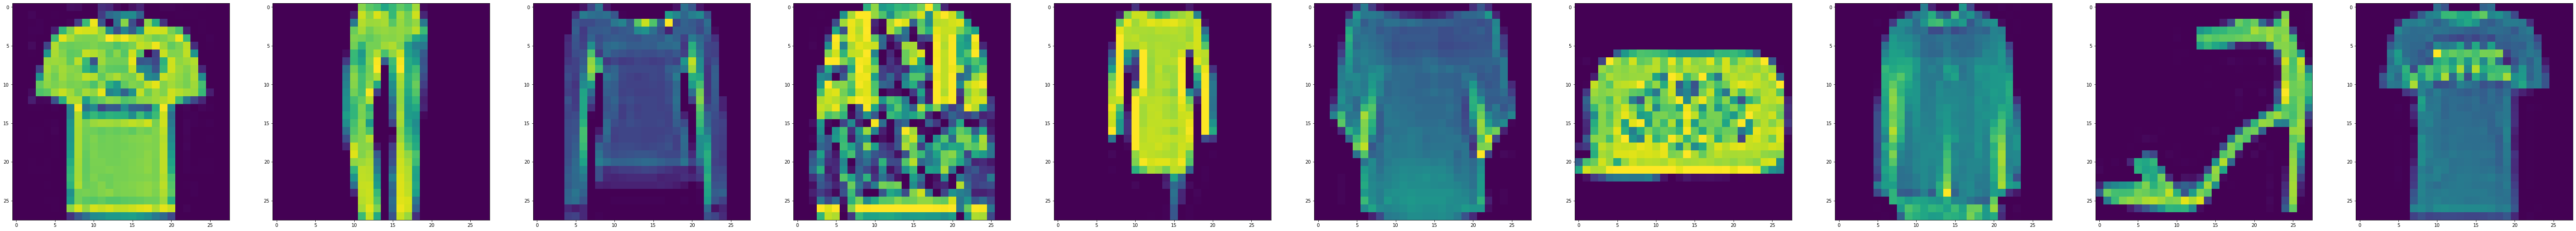

In [ ]:
#Display Original
f, ax = plt.subplots(1,10)
f.set_size_inches(100, 100)
for i in range(10):
    ax[i].imshow(x_test[i].reshape(28, 28))
plt.show()

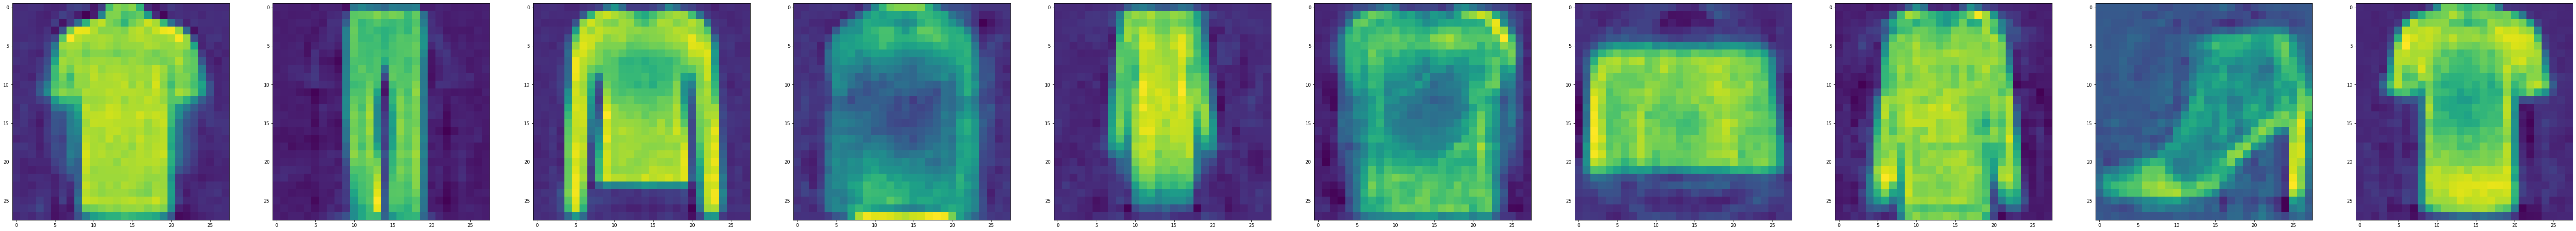

In [ ]:
#Display Reconstructed Images
f, ax = plt.subplots(1,10)
f.set_size_inches(100, 100)
for i in range(10):
    ax[i].imshow(reconstructed[i].reshape(28, 28))
plt.show()